In [ ]:
import networkx as nx
from networkx.algorithms import approximation
import matplotlib.pyplot as plt
from collections import Counter
import random
from itertools import combinations, groupby

import statistics

%matplotlib inline

In [ ]:
!tar -xvf "/content/facebook.tar" -C "/content/facebook/"

facebook/
facebook/3980.egofeat
facebook/0.featnames
facebook/698.egofeat
facebook/3437.feat
facebook/3980.featnames
facebook/0.edges
facebook/3437.circles
facebook/686.circles
facebook/348.egofeat
facebook/107.feat
facebook/348.feat
facebook/1912.circles
facebook/3437.egofeat
facebook/698.feat
facebook/348.edges
facebook/1912.feat
facebook/414.circles
facebook/1684.egofeat
facebook/1684.featnames
facebook/1684.feat
facebook/107.egofeat
facebook/0.circles
facebook/414.edges
facebook/698.featnames
facebook/698.edges
facebook/1912.featnames
facebook/107.edges
facebook/107.circles
facebook/0.egofeat
facebook/414.featnames
facebook/3980.feat
facebook/3437.featnames
facebook/1912.egofeat
facebook/414.egofeat
facebook/698.circles
facebook/348.featnames
facebook/348.circles
facebook/0.feat
facebook/1684.circles
facebook/3437.edges
facebook/3980.edges
facebook/686.featnames
facebook/1912.edges
facebook/3980.circles
facebook/686.feat
facebook/1684.edges
facebook/414.feat
facebook/686.egofeat
fa

In [ ]:
def explore_and_summarize_network(edgelist, vertices, subgraph, directed=False):
    """
    Concisely summarizes any induced subgraph of the input network
    """
    G = nx.Graph()
    if subgraph is not None:
        induced_edges = [ edge for edge in edgelist if ((edge[0] in subgraph) and (edge[1] in subgraph))]
        G.add_nodes_from(subgraph)
        G.add_edges_from(induced_edges, nodetype=int)
    else :
        G.add_nodes_from(vertices)
        G.add_edges_from(edgelist, nodetype=int)

    # (a)
    nx.draw(G,pos=nx.spring_layout(G),node_color='maroon',
        node_size=20,
        edge_color="gray",
        width=0.5)
    plt.show()
    # (b)
    if directed:
        in_degree_sequence = [item[-2] for item in local_summaries(G)]
        in_degree_counts = Counter(degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(in_degree_counts.keys(), in_degree_counts.values())
        ax.set_xlabel('Nodes')
        ax.set_ylabel('In Degrees')
        ax.set_title(r'Histogram of in_degrees')
        fig.tight_layout()
        plt.show()

        out_degree_sequence = [item[-1] for item in local_summaries(G)]
        out_degree_counts = Counter(out_degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(out_degree_counts.keys(), out_degree_counts.values())
        ax.set_xlabel('Nodes')
        ax.set_ylabel('out Degrees')
        ax.set_title(r'Histogram of out_degrees')
        fig.tight_layout()
        plt.show()
    else:
        degree_sequence = [item[-1] for item in local_summaries(G)]
        degree_counts = Counter(degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(degree_counts.keys(), degree_counts.values())
        ax.set_xlabel('Nodes')
        ax.set_ylabel('Degrees')
        ax.set_title(r'Histogram of degrees')
        fig.tight_layout()
        plt.show()
    # (c)
    betweenness_centrality = [item[0] for item in local_summaries(G)]
    fig1, ax1 = plt.subplots()
    ax1.hist(betweenness_centrality)
    ax1.set_xlabel('Nodes')
    ax1.set_ylabel('Betweenness Centrality')
    ax1.set_title(r'Histogram of Betweenness Centrality')
    fig1.tight_layout()
    plt.show()
    # (d)
    eigenvector_centrality = [item[1] for item in local_summaries(G)]
    fig2, ax2 = plt.subplots()
    ax2.hist(eigenvector_centrality)
    ax2.set_xlabel('Nodes')
    ax2.set_ylabel('Eigenvector Centrality')
    ax2.set_title(r'Histogram of Eigenvector Centrality')
    fig2.tight_layout()
    plt.show()
    # Print Global Summaries
    global_summaries(G)

In [ ]:
def local_summaries(G, directed=False):
    betweenness_centrality = nx.centrality.betweenness_centrality(G)
    eigenvector_centrality = nx.centrality.eigenvector_centrality(G)
    closeness_centrality = nx.centrality.closeness_centrality(G)
    if directed:
        in_degrees = [G.in_degree(n) for n in G.nodes]
        out_degrees = [G.in_degree(n) for n in G.nodes]
        return zip(betweenness_centrality.values(), eigenvector_centrality.values(), closeness_centrality.values(), in_degrees, out_degrees)
    else:
        degrees = [G.degree(n) for n in G.nodes]
        return zip(betweenness_centrality.values(), eigenvector_centrality.values(), closeness_centrality.values(), degrees)

In [ ]:
def global_summaries(G):
    try:
        diameter = nx.algorithms.distance_measures.diameter(G)
    except:
        diameter = "Found infinite path length because the graph is not connected !"
    clustering_coefficient = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)
    number_of_nodes = G.number_of_edges()
    number_of_edges = G.number_of_nodes()
    number_of_connected_components = nx.number_connected_components(G)
    largest_connected_component = max([ len(i) for i in list(nx.connected_components(G))])
    print("##### Global Summaries #####")
    print("Diameter : ",diameter)
    print("Number of Nodes : ",number_of_nodes)
    print("Number of Edges : ",number_of_edges)
    print("Number of Connected Components : ",number_of_connected_components)
    print("Size of the Largest Connected Compopnent : ",largest_connected_component)

In [ ]:
def read_circles(file_path):
    with open(file_path) as f :
        content = f.readlines()
        content = [line.replace("\n","") for line in content]
        content = [line.split("\t") for line in content]
    return {circle[0]:list(map(int,circle[1:])) for circle in content} # Convert nodes to int and add to dict.

In [ ]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

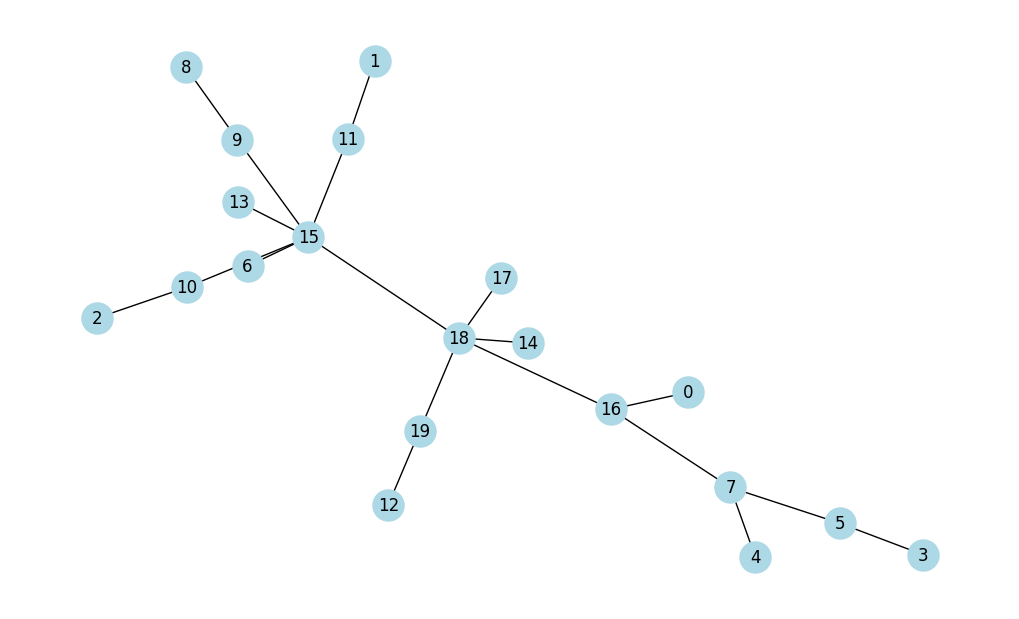

In [ ]:
nodes = 20
seed = random.randint(1,10)
probability = 0.001
G_random = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(10,6))

nx.draw(G_random, node_color='lightblue',
        with_labels=True,
        node_size=500)

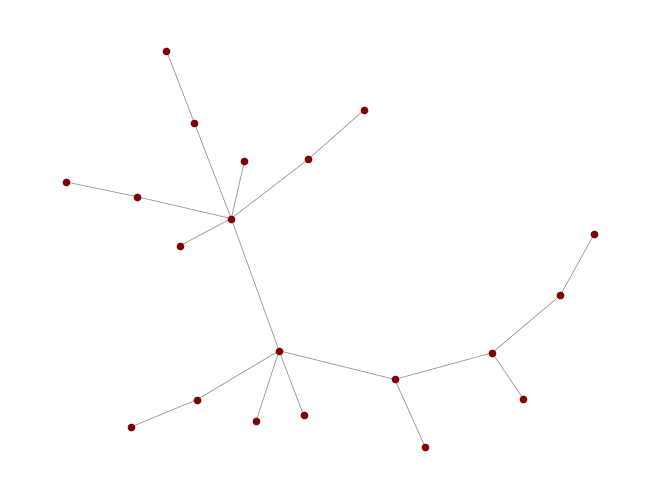

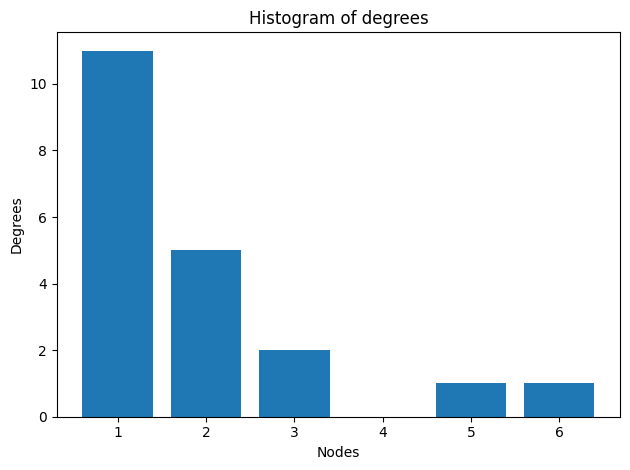

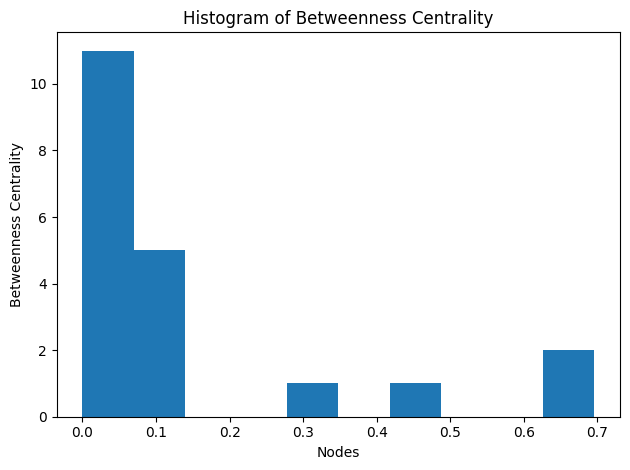

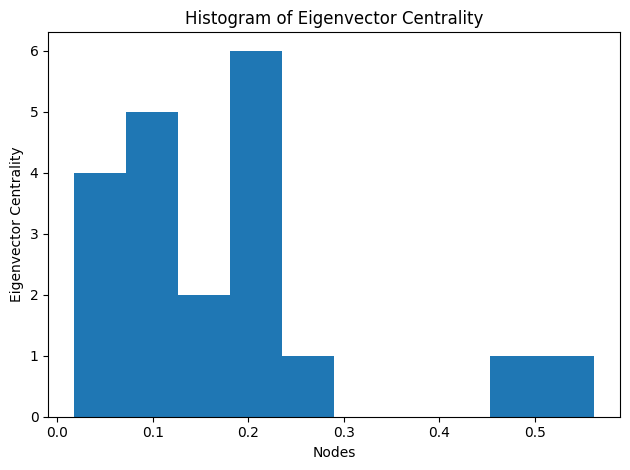

##### Global Summaries #####
Diameter :  7
Number of Nodes :  19
Number of Edges :  20
Number of Connected Components :  1
Size of the Largest Connected Compopnent :  20


In [ ]:
explore_and_summarize_network(edgelist = G_random.edges(), vertices=G_random.nodes(), subgraph=None)

In [ ]:
vertices = list(G_random.nodes())
to_remove = random.sample(range(0, 20), 5)
subgraph_vertices = [e for e in vertices if e not in to_remove]
print("Total removed nodes : ",len(vertices)-len(subgraph_vertices))

Total removed nodes :  5


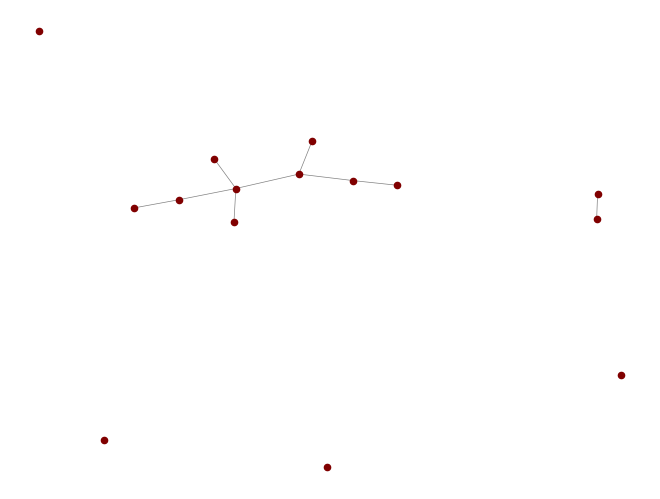

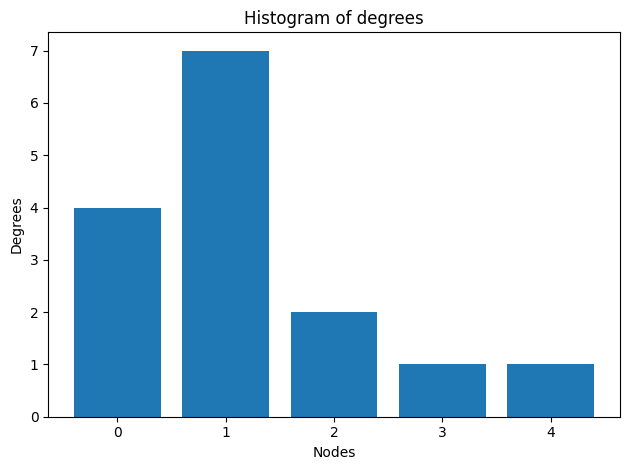

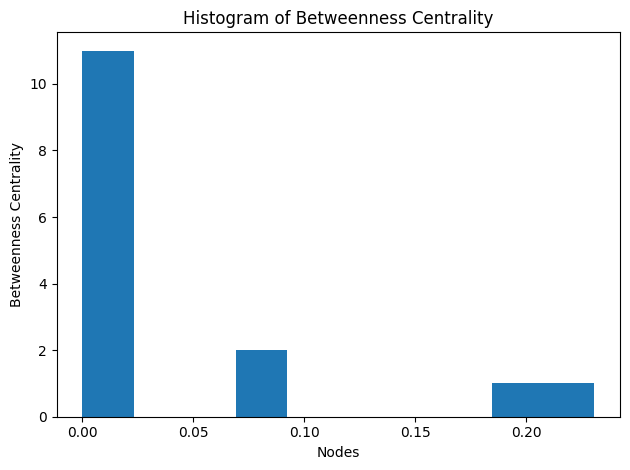

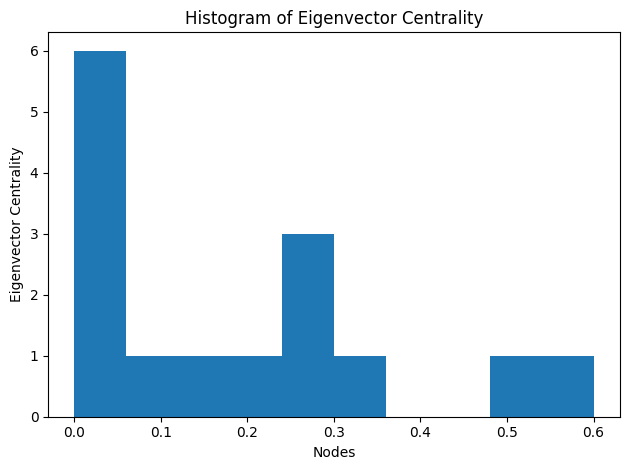

##### Global Summaries #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  9
Number of Edges :  15
Number of Connected Components :  6
Size of the Largest Connected Compopnent :  9


In [ ]:
explore_and_summarize_network(edgelist = G_random.edges(), vertices=G_random.nodes(),
                              subgraph=subgraph_vertices)

In [ ]:
G = nx.read_edgelist('/content/facebook/facebook/107.edges', nodetype=int)

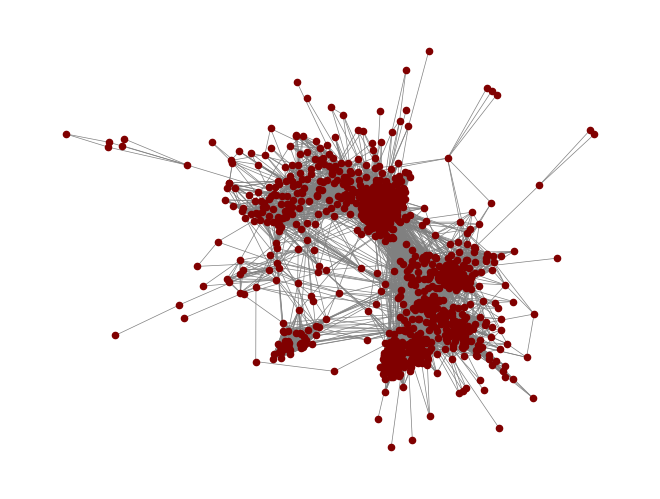

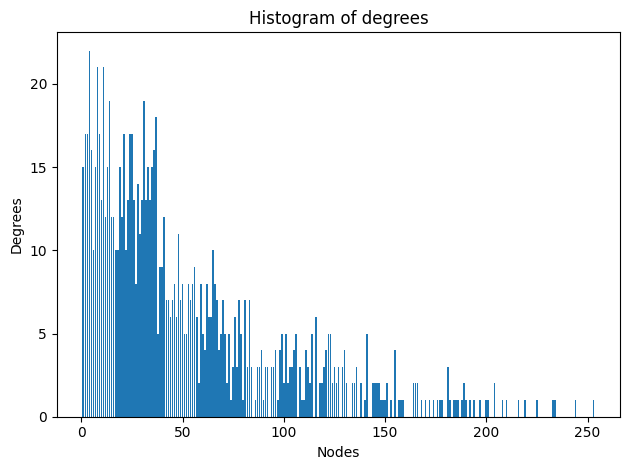

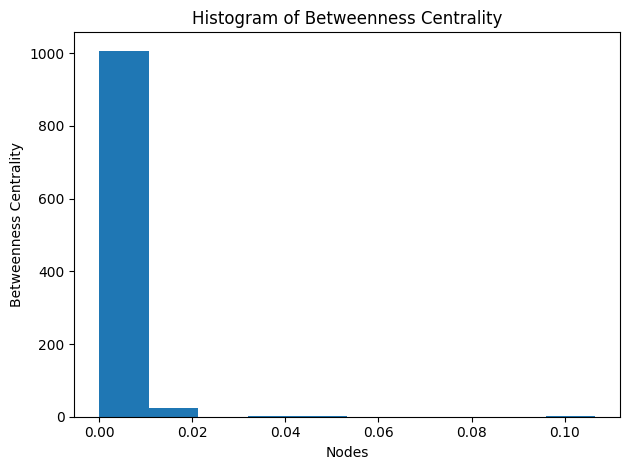

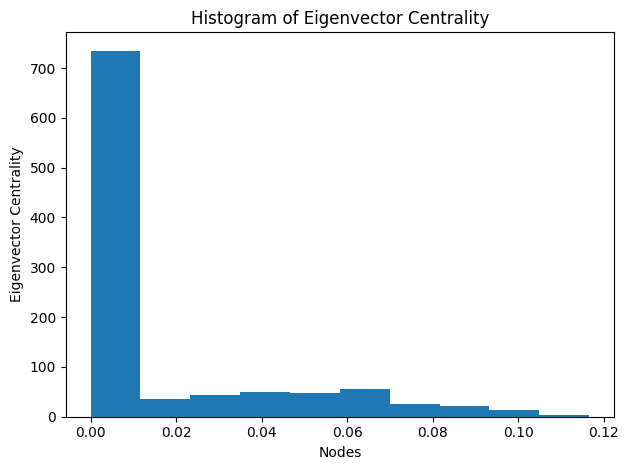

##### Global Summaries #####
Diameter :  9
Number of Nodes :  26749
Number of Edges :  1034
Number of Connected Components :  1
Size of the Largest Connected Compopnent :  1034


In [ ]:
explore_and_summarize_network(edgelist = G.edges(), vertices=G.nodes(), subgraph=None)

In [ ]:
circles = read_circles("/content/facebook/facebook/107.circles")


 CIRCLE0 



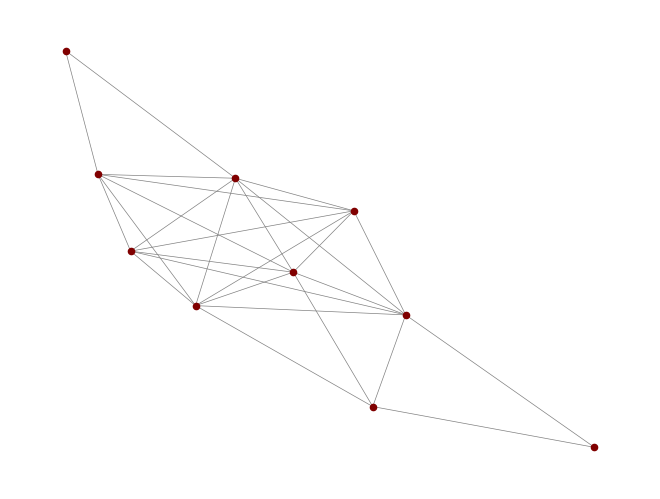

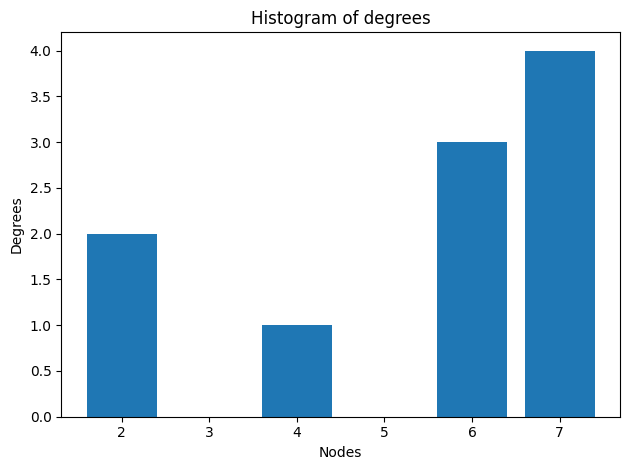

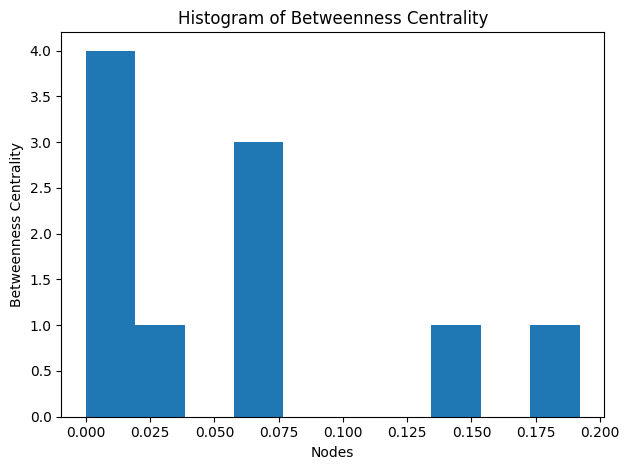

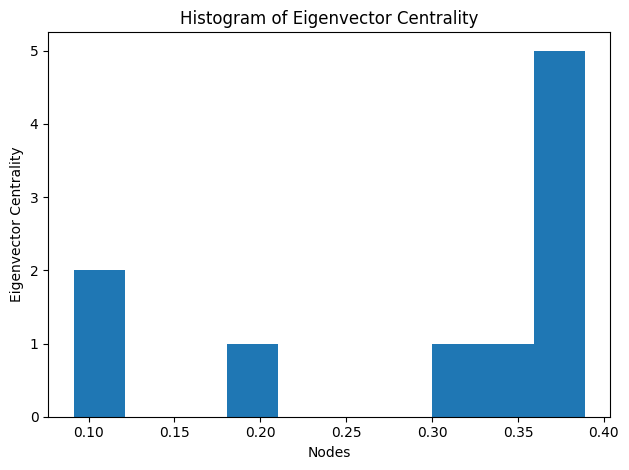

##### Global Summaries #####
Diameter :  3
Number of Nodes :  27
Number of Edges :  10
Number of Connected Components :  1
Size of the Largest Connected Compopnent :  10

 CIRCLE1 



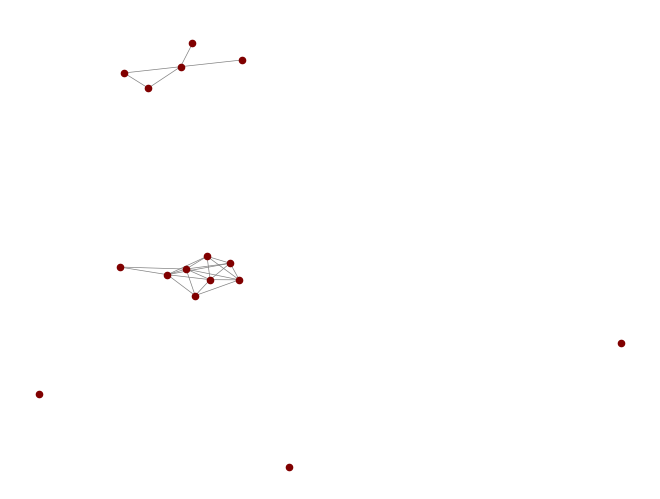

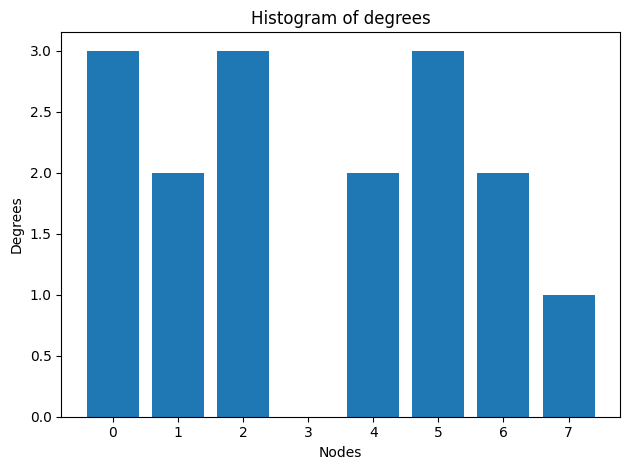

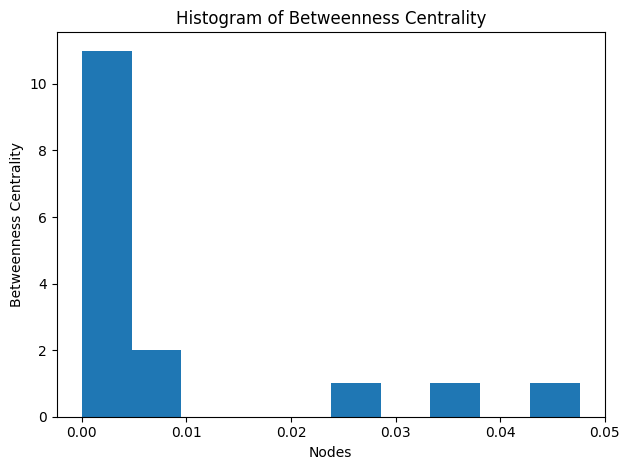

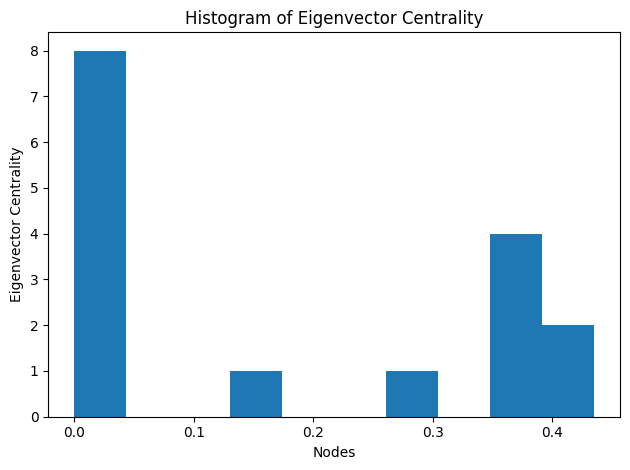

##### Global Summaries #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  25
Number of Edges :  16
Number of Connected Components :  5
Size of the Largest Connected Compopnent :  8

 CIRCLE2 



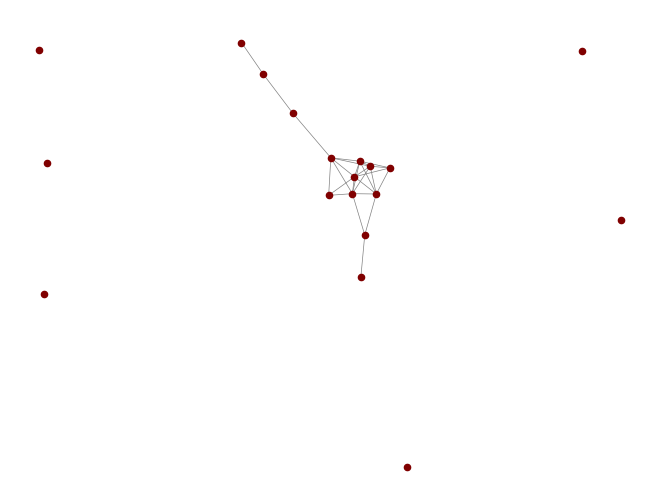

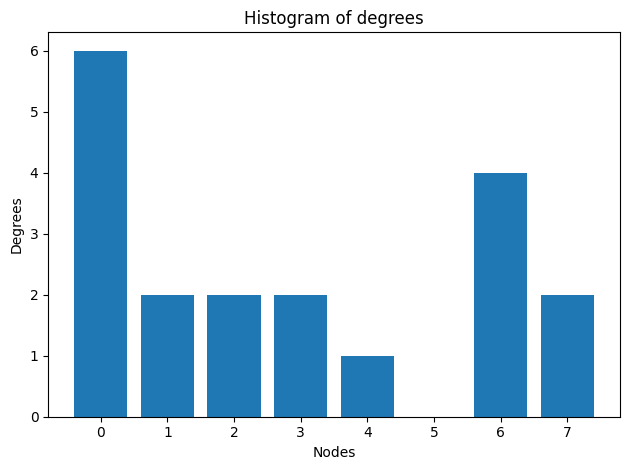

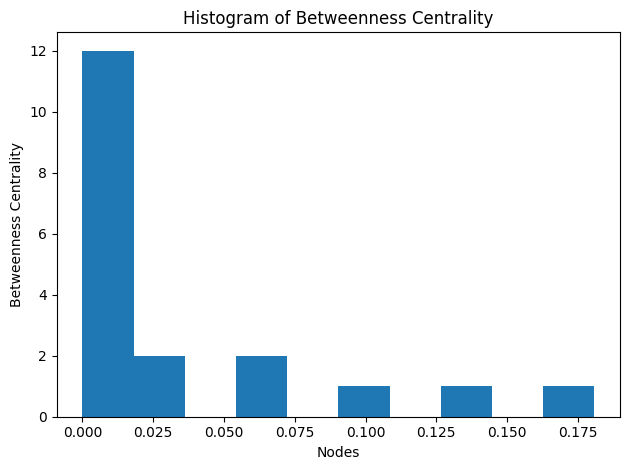

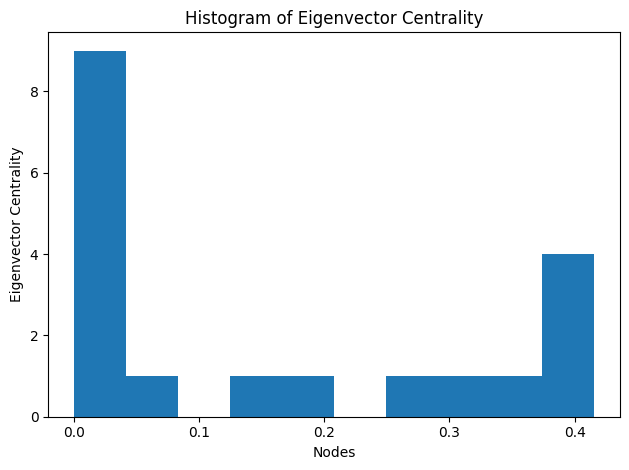

##### Global Summaries #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  27
Number of Edges :  19
Number of Connected Components :  7
Size of the Largest Connected Compopnent :  13

 CIRCLE3 



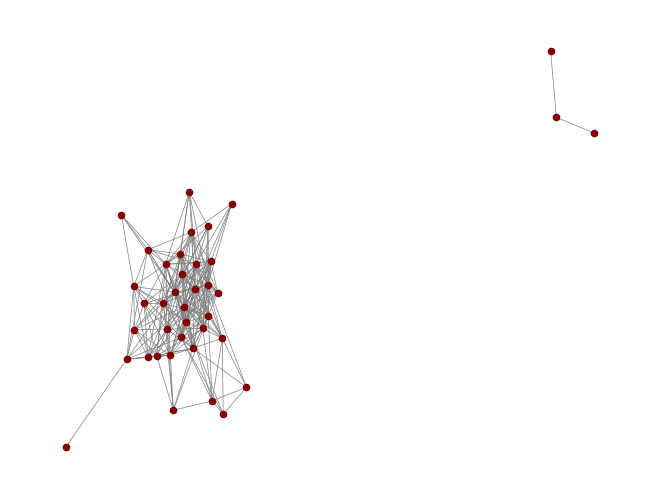

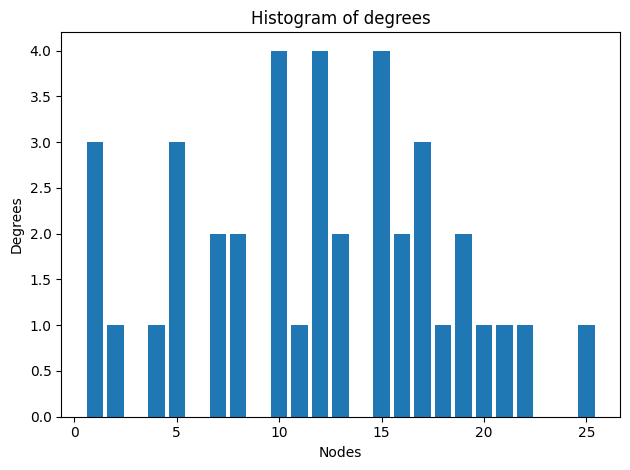

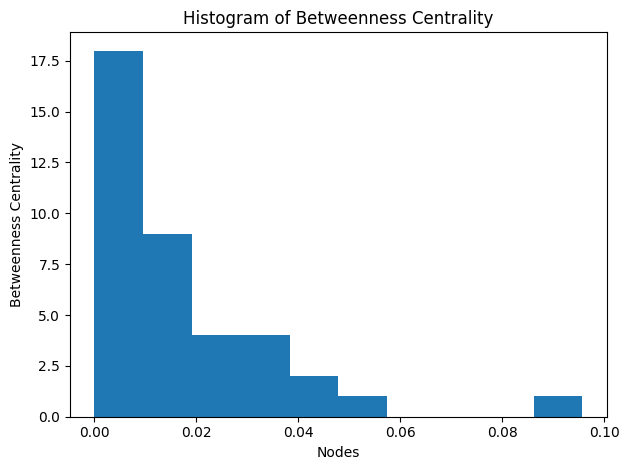

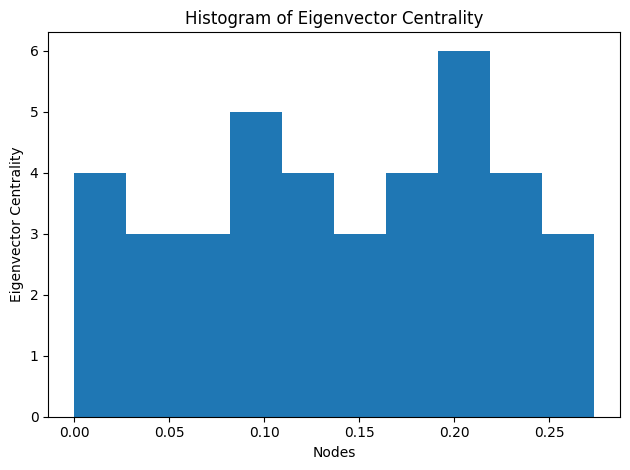

##### Global Summaries #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  233
Number of Edges :  39
Number of Connected Components :  2
Size of the Largest Connected Compopnent :  36

 CIRCLE4 



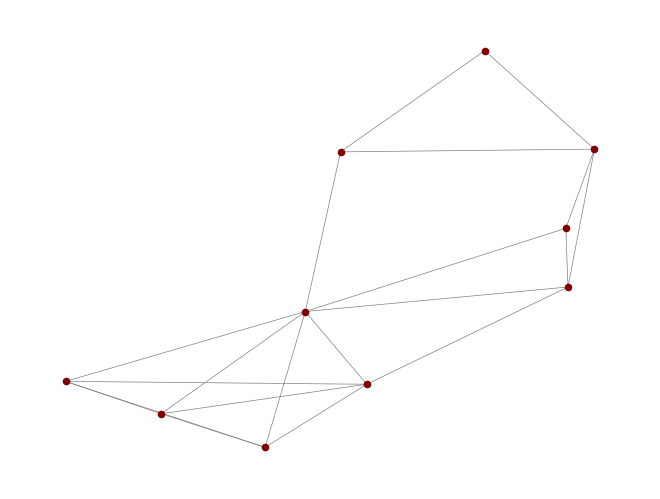

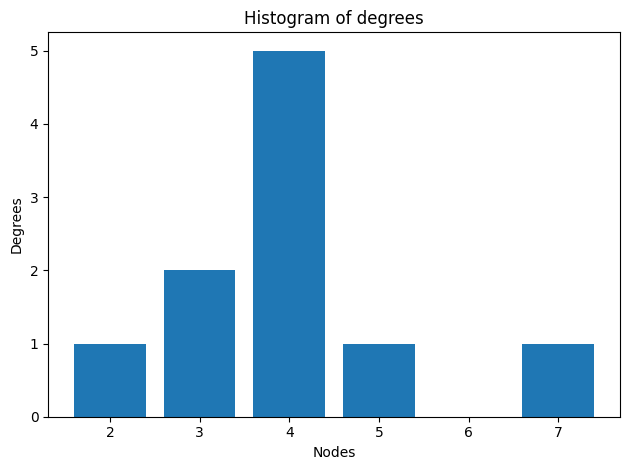

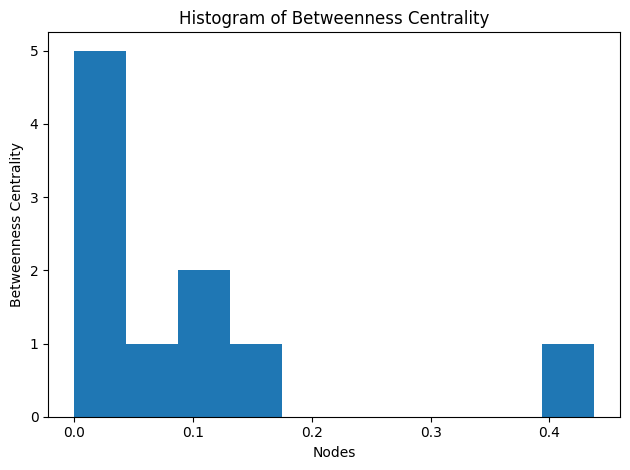

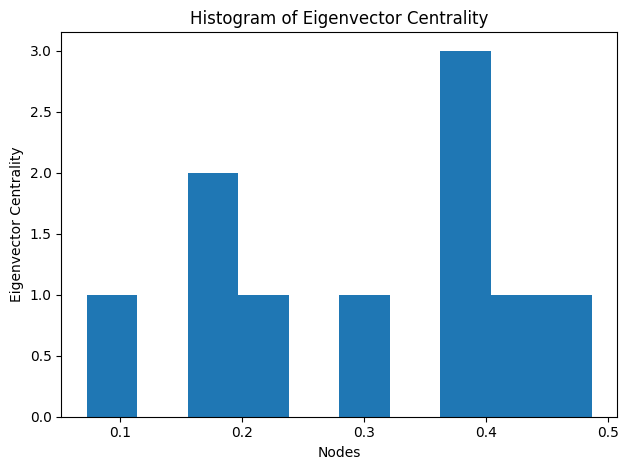

##### Global Summaries #####
Diameter :  3
Number of Nodes :  20
Number of Edges :  10
Number of Connected Components :  1
Size of the Largest Connected Compopnent :  10

 CIRCLE5 



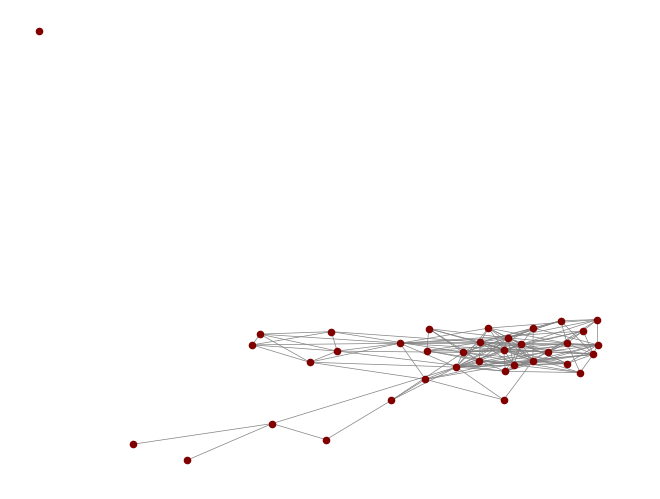

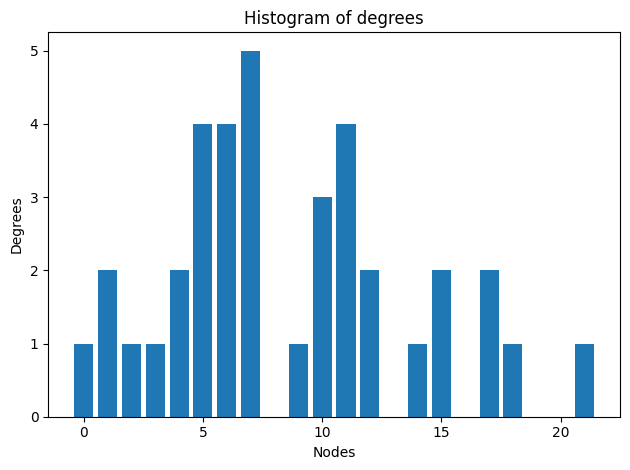

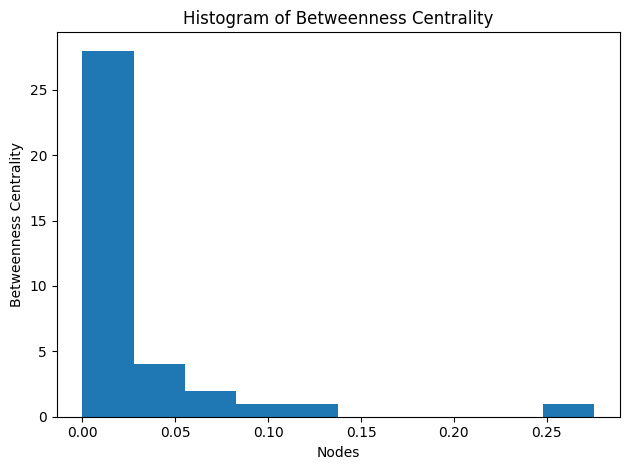

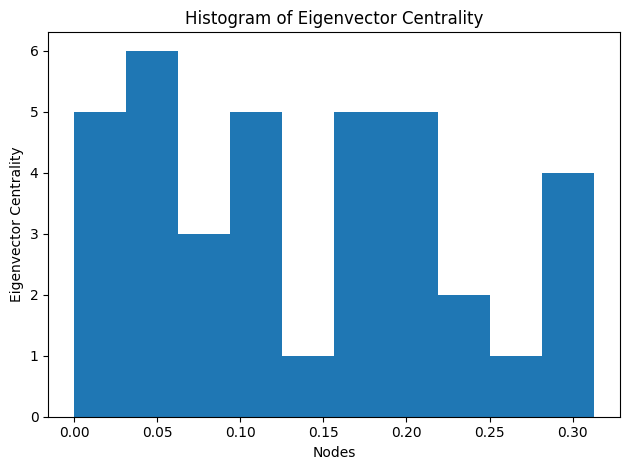

##### Global Summaries #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  159
Number of Edges :  37
Number of Connected Components :  2
Size of the Largest Connected Compopnent :  36

 CIRCLE6 



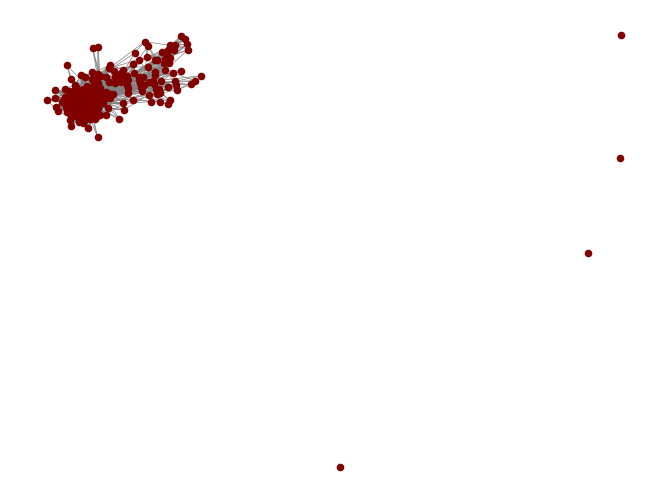

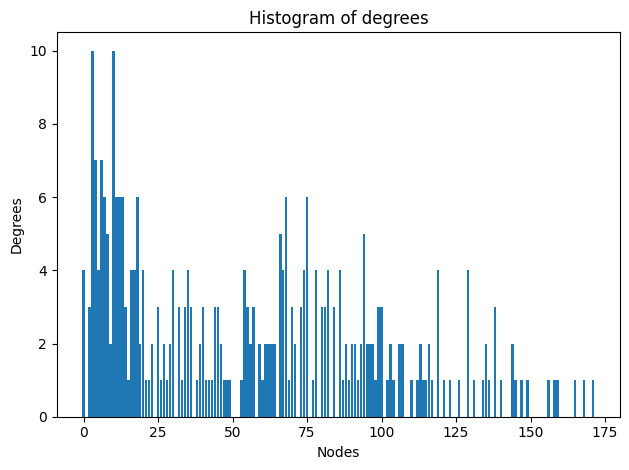

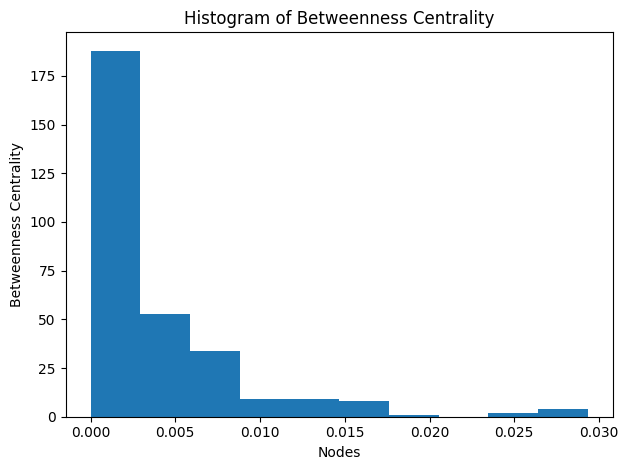

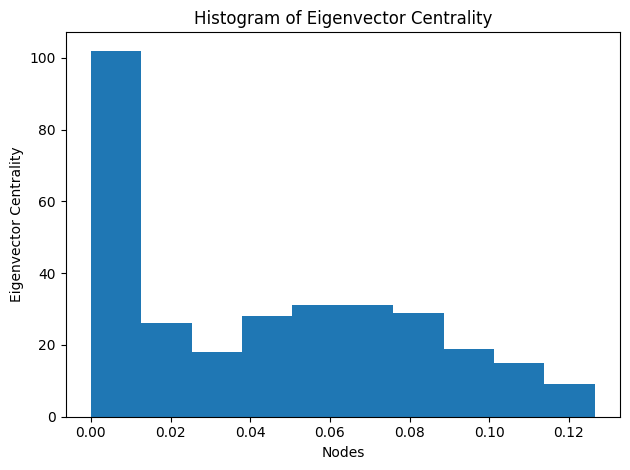

##### Global Summaries #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  8612
Number of Edges :  308
Number of Connected Components :  5
Size of the Largest Connected Compopnent :  304

 CIRCLE7 



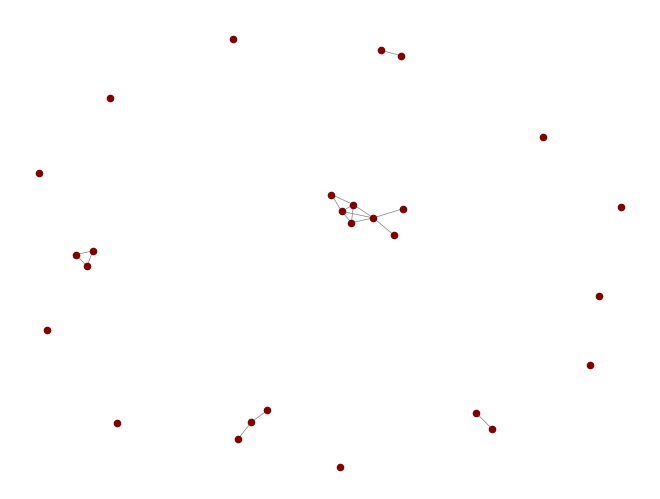

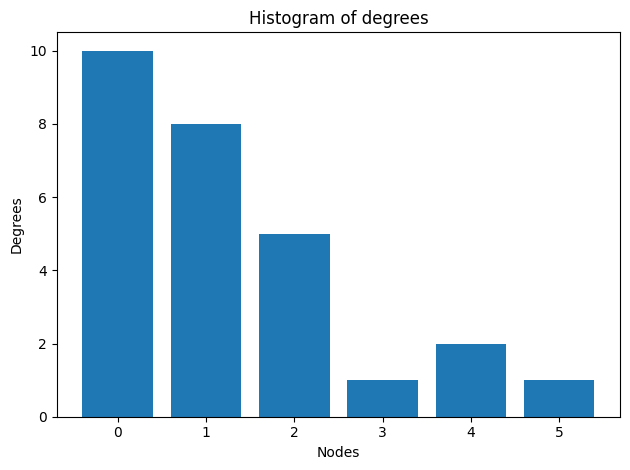

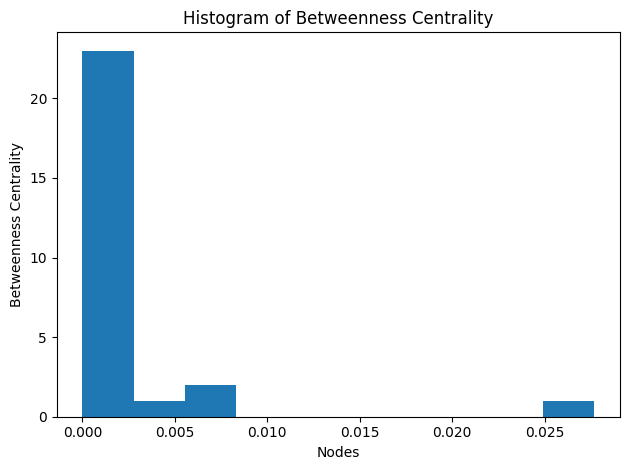

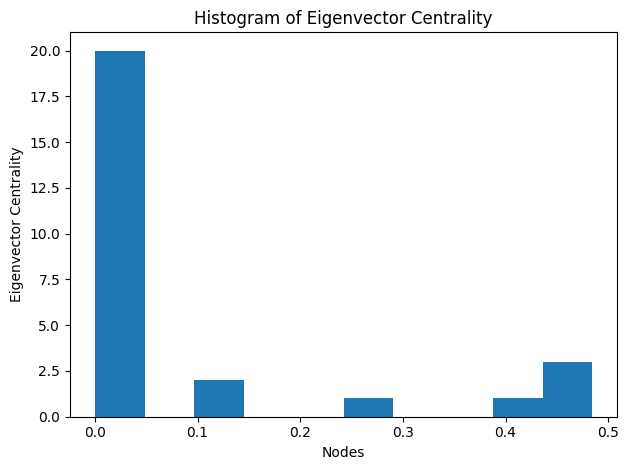

##### Global Summaries #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  17
Number of Edges :  27
Number of Connected Components :  15
Size of the Largest Connected Compopnent :  7

 CIRCLE8 



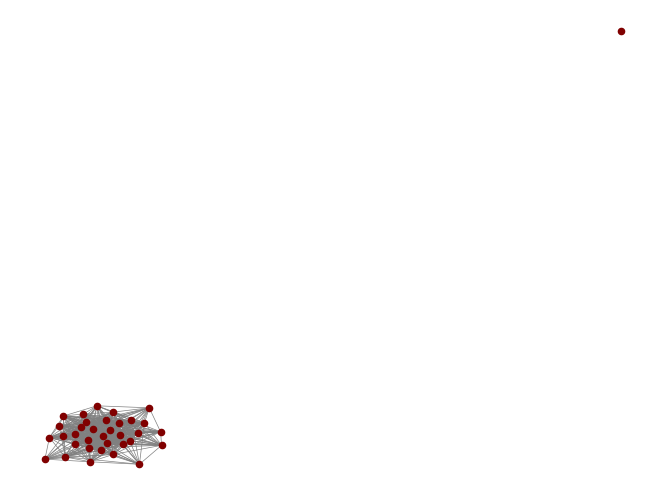

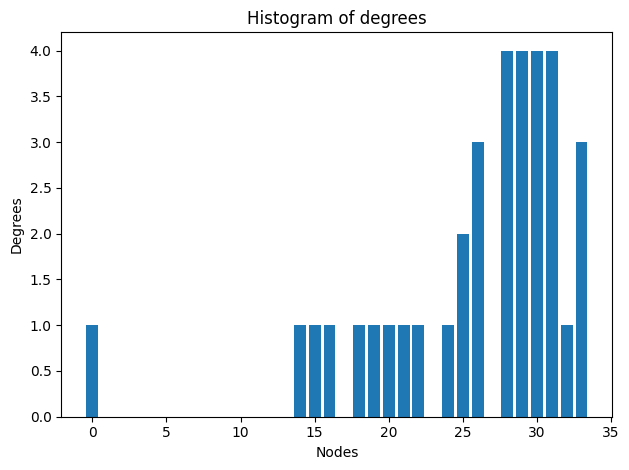

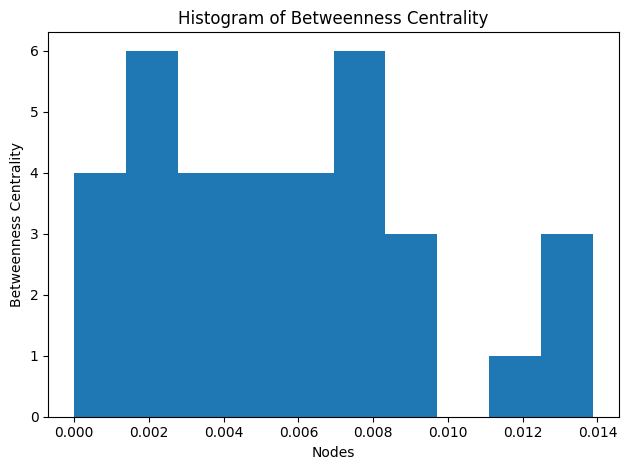

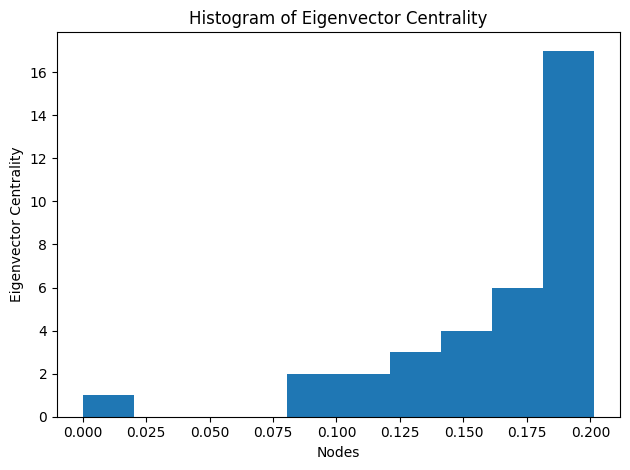

##### Global Summaries #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  450
Number of Edges :  35
Number of Connected Components :  2
Size of the Largest Connected Compopnent :  34


In [ ]:
for c in circles:
    print("\n",c.upper(),"\n")
    explore_and_summarize_network(edgelist = list(G.edges()), vertices=list(G.nodes()), subgraph=circles[c])

In [ ]:
G_combined = nx.read_edgelist("facebook_combined.txt.gz", create_using = nx.Graph(), nodetype=int)

In [ ]:
def degrees_of_separation(G, max_iter = 1000):
    shortest_paths = []
    for _ in range(max_iter):
        rand_two = random.sample(list(G.nodes), 2)
        shortest_paths.append(nx.shortest_path_length(G,rand_two[0], rand_two[1]))
    fig, ax = plt.subplots()
    ax.hist(shortest_paths, color = "orange")
    ax.set_xlabel('Lengths')
    ax.set_ylabel('Shortest Path')
    ax.set_title('The Distribution of the 1000 Shortest Path Lengths')
    plt.show()
    print("\nMean : ",statistics.mean(shortest_paths))

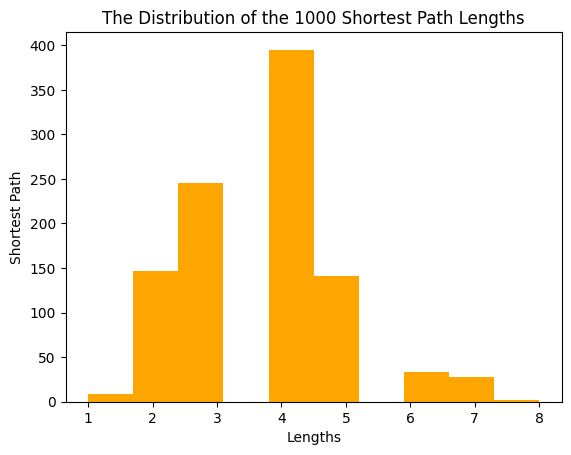


Mean :  3.733


In [ ]:
degrees_of_separation(G_combined)